# Project 02: Sentiment analysis using Twitter data 

##Group 04: 

###Hasan Iftekhar 
Worked on the Logistic Regression model and the compilation of the project.
###Raja Nabeel Ahsan 
Worked on feature extraction and helped with the model implementation.
###Andreas Byskov
Responsible for the pre-processing module.
###Edward Peter Dontoh
Implemented the Random Forest Model.
###Raheela Nawaz
Implemented the Bernoulli model.



**Abstract**

Finding the emotional undertone of a string of words, specifically on Twitter, is the method of conducting a Twitter sentiment analysis. An automated method known as sentiment analysis is used to gather important data about customer attitudes, emotions, and opinions. In our project we have been given a labelled dataset of 1.6 million tweets gathered using an API. The  tweets  have  been 
annotated (0 = negative, 4 = positive), and they can be used to detect sentiment. 

The steps taken in the project are: 


1.   Import the Dataset
2.   Visualising the data
3.   Data Preprocessing
4.   Splitting our data into Train and Test Subset
5.   Transforming Dataset using TF-IDF Vectorizer
6.   Creating a Function for Model Evaluation
7.   Choosing and implementing a model
8.   Conclusion based on results

As the dataset was very large, we uploaded it onto google drive and mounted the drive into our collab notebook. 

The CSV file is read and cast onto a dataframe for easy processing. The column names are defined according to the order of the data. 

In [122]:
import pandas as pd
col=['target','ids','date','flag','user','text']
df=pd.read_csv('C:/Users/donto/Downloads/training.1600000.processed.noemoticon.csv/training.1600000.processed.noemoticon.csv', encoding ='ISO-8859-1',names=col)

The dependencies and libraries are imported as per the requirement of different portions of code. 

In [123]:
#Dependencies


import re
from re import sub# regular expression
import numpy as np
import pandas as pd
import string 

# for plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
from nltk.stem import WordNetLemmatizer
import nltk.stem as stem
import nltk
nltk.download('stopwords')
from nltk.stem import PorterStemmer
nltk.download('punkt') #Sentence Tokenizer

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\donto/nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to C:\Users\donto/nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [124]:
print('Dataset size {}'.format(len(df)))
print(df.columns)
print(df.dtypes)
print('Dataset first five rows:\n{}'.format(df.sample(5)))


Dataset size 1600000
Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')
target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object
Dataset first five rows:
         target         ids                          date      flag  \
607768        0  2223080516  Thu Jun 18 07:49:31 PDT 2009  NO_QUERY   
642059        0  2235397800  Fri Jun 19 01:06:57 PDT 2009  NO_QUERY   
946934        4  1822865388  Sat May 16 20:34:05 PDT 2009  NO_QUERY   
1370066       4  2050940845  Fri Jun 05 19:34:15 PDT 2009  NO_QUERY   
1014745       4  1881475477  Fri May 22 04:46:12 PDT 2009  NO_QUERY   

                   user                                               text  
607768     jessicalonik  Saying my goodbye to Melissa...and crying for ...  
642059   brainlesssteel  Holy crap, the Ghostbusters video game is out!...  
946934         turnme0n  @j3nna dude! people liked our toques. hahaha )...  
1370066         ACLAZ92  @fleu

target
0    800000
4    800000
dtype: int64


[Text(0, 0, 'Negative'), Text(1, 0, 'Positive')]

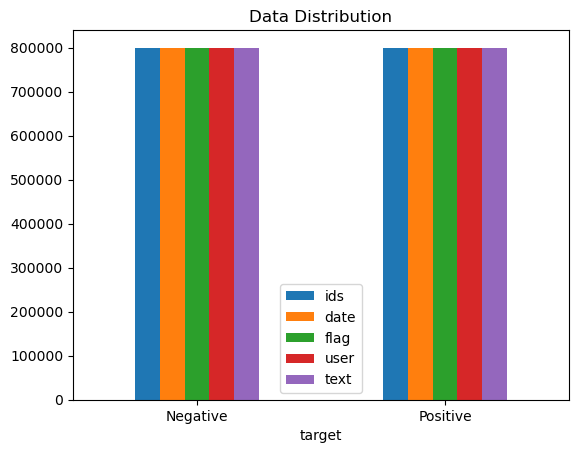

In [125]:
# Plotting the distribution for dataset.
print(df.value_counts('target'))
ax = df.groupby('target').count().plot(kind='bar', title='Data Distribution',legend=True)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# data in lists.
#text, sentiment = list(df['text']), list(df['target'])

<AxesSubplot:xlabel='target', ylabel='count'>

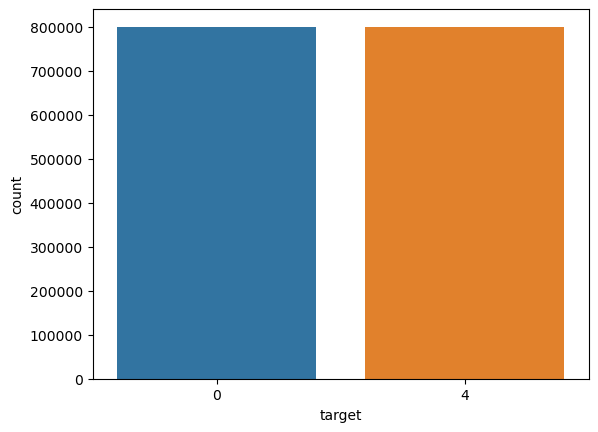

In [126]:
import seaborn as sns
sns.countplot(x='target', data=df)

This portion of the code deals with the preprocessing of the data, in order to prepare it so that a model can be ran using the data.


We removed stopwords (words without meaning) and special characters (emojis) from the dataset. For easier generalization, the text is then changed to lowercase.

Punctuation was then cleaned up and eliminated, which lessened the dataset's needless noise. The repetitive letters from the words were then eliminated, and the URLs were also removed because they weren't particularly important.

For better results, we finally did stemming (which reduces the words to their derived stems).

In [127]:
data=df[['text','target']]
data['target'].unique()

data_pos = data[data['target'] == 4]
data_neg = data[data['target'] == 0]

data_pos = data_pos.iloc[:int(60000)]
data_neg = data_neg.iloc[:int(60000)]


#Lower Case
dataset = pd.concat([data_pos, data_neg])
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

#Removing StopWords
from nltk.corpus import stopwords
STOPWORDS = stopwords.words('english')
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].tail()

59995             i'm strop birthday far away want present
59996    going shopping today. professional clothes wor...
59997    @vickyclare85 get swine flu probably too, woul...
59998                            i'm mood studing!!!!!!!!!
59999                                    i'm breaking out.
Name: text, dtype: object

In [128]:
#Removing Punctuation
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

59995              im strop birthday far away want present
59996    going shopping today professional clothes work...
59997    vickyclare85 get swine flu probably too would ...
59998                                      im mood studing
59999                                      im breaking out
Name: text, dtype: object

In [129]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

59995              im strop birthday far away want present
59996    going shopping today professional clothes work...
59997    vickyclare85 get swine flu probably too would ...
59998                                      im mood studing
59999                                      im breaking out
Name: text, dtype: object

In [130]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

59995              im strop birthday far away want present
59996    going shopping today professional clothes work...
59997    vickyclare85 get swine flu probably too would ...
59998                                      im mood studing
59999                                      im breaking out
Name: text, dtype: object

In [131]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

59995              im strop birthday far away want present
59996    going shopping today professional clothes work...
59997    vickyclare get swine flu probably too would un...
59998                                      im mood studing
59999                                      im breaking out
Name: text, dtype: object

In [132]:
from nltk.tokenize import word_tokenize #splits a given sentence into words using the NLTK library

tweetText = dataset['text']
tweetText = tweetText.apply(word_tokenize)
dataset['text']=tweetText
dataset['text'].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

Stemming is a faster process than lemmatization as stemming chops off the word irrespective of the context, whereas the latter is context-dependent. We preferred Stemming over Lemmatization in this project due to the low cost of processing, as no lookup tables are required and the dataset is too big.

In [133]:
 
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

In [134]:
#separating the feature and label

x=data.text
y=data.target

A word cloud is a visual representation of words. Cloud creators are used to highlight popular words and phrases based on frequency and relevance in any writeup.

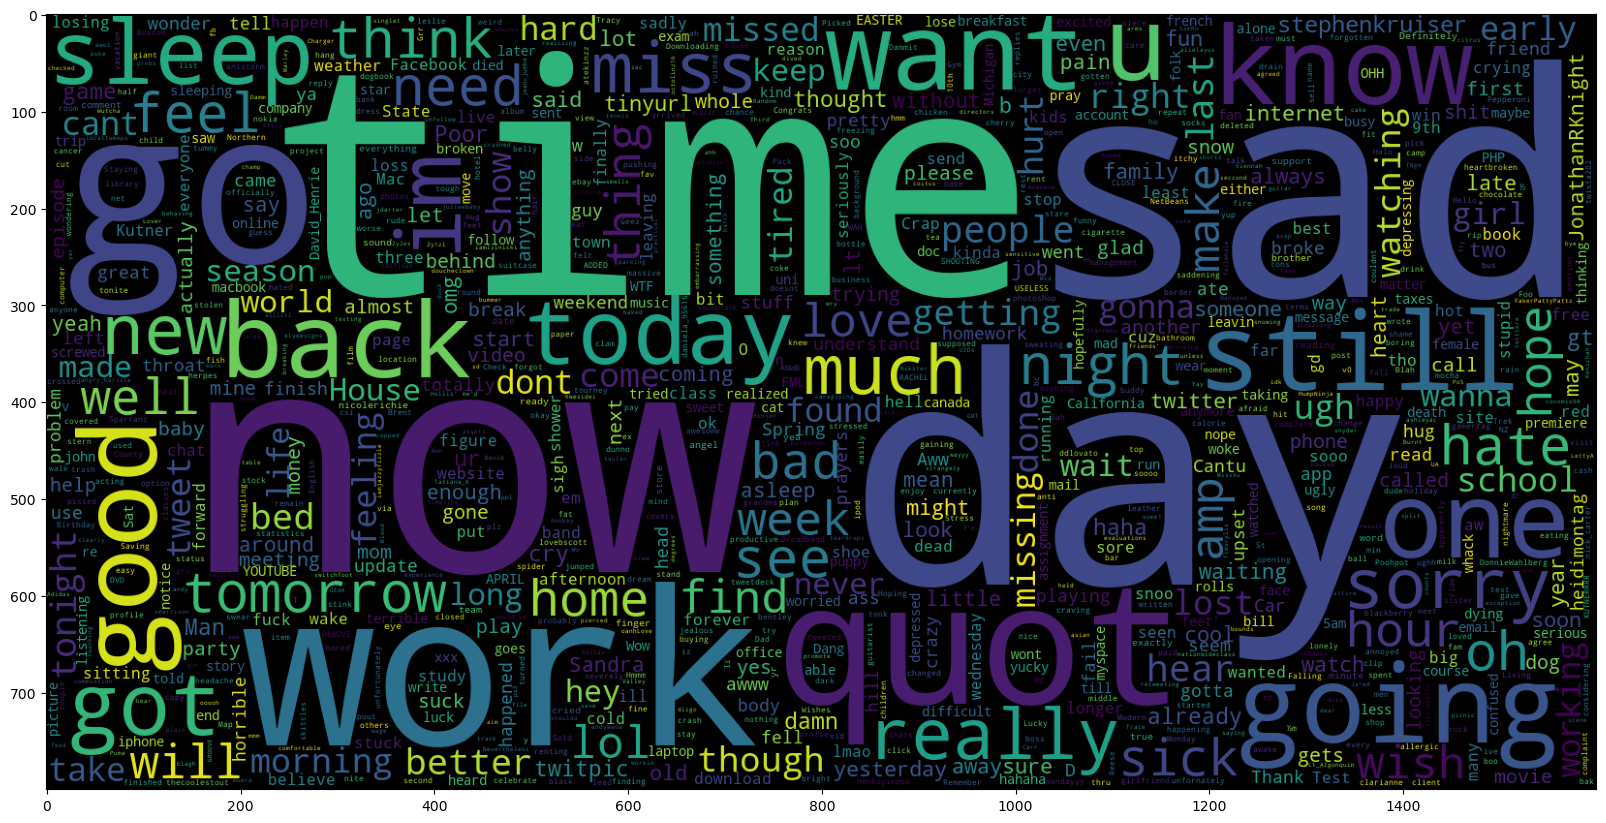

In [135]:
data_neg = data['text'][:800]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

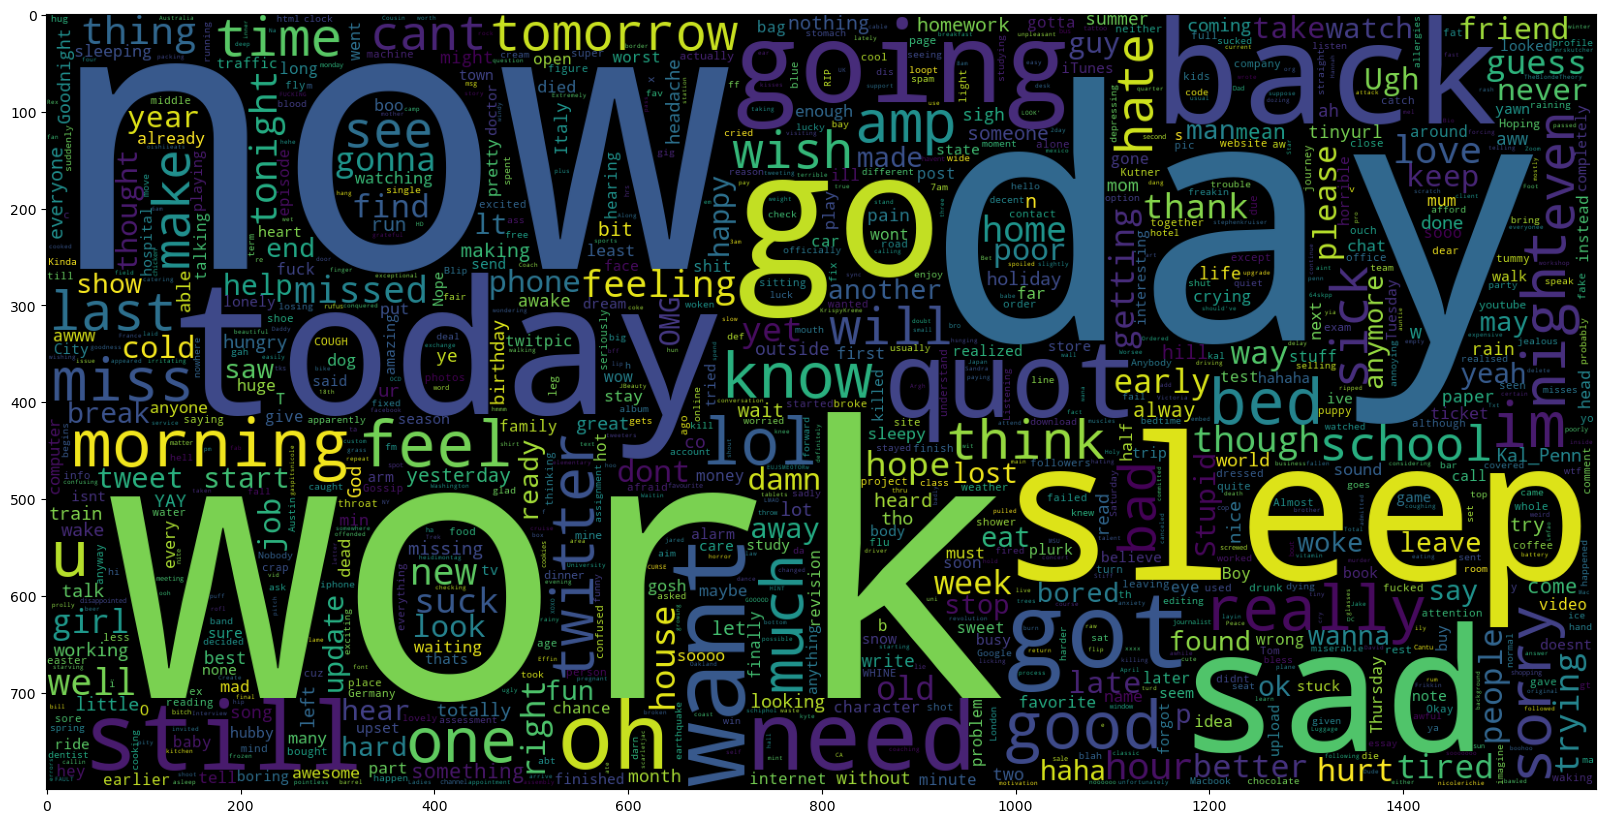

In [136]:
data_pos = data['text'][800:2000]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [137]:
# 95% data for training data and 5% for testing data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.05, random_state =2101)

TF-IDF (Term Frequency - Inverse Document Frequency) is a handy algorithm that uses the frequency of words to determine how relevant those words are to a given document and helps to distinguish features.

TF gives us information on how often a term appears in a document and IDF gives us information about the relative rarity of a term in the collection of documents. By multiplying these values together we can get our final TF-IDF value.


In [138]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=5000000) #Convert a collection of raw documents to a matrix of TF-IDF features.
vectoriser.fit(x_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))
x_train = vectoriser.transform(x_train)
x_test  = vectoriser.transform(x_test)

c:\Users\donto\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


No. of feature_words:  4903479


This function is where we define how the model is going to run and the resultant confusion matrix is plotted. 

In [139]:
def run_model(model):
# Predict values for Test dataset
  y_pred = model.predict(x_test)

# evaluate model 
  print(classification_report(y_test, y_pred))

# Compute and plot the Confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Positive']
  group_names = ['True Negative ','False Positive ', 'False Negative ','True Positive ']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

The Bernoulli distribution is a discrete probability distribution that covers a case where an event will have a binary outcome as either a 0 or 1.

When classifying a document, the Bernoulli model uses binary occurrence information, ignoring the number of occurrences, which is why the accuracy may be low when the dataset it large. 

              precision    recall  f1-score   support

           0       0.80      0.82      0.81     40049
           4       0.81      0.79      0.80     39951

    accuracy                           0.80     80000
   macro avg       0.81      0.80      0.80     80000
weighted avg       0.81      0.80      0.80     80000



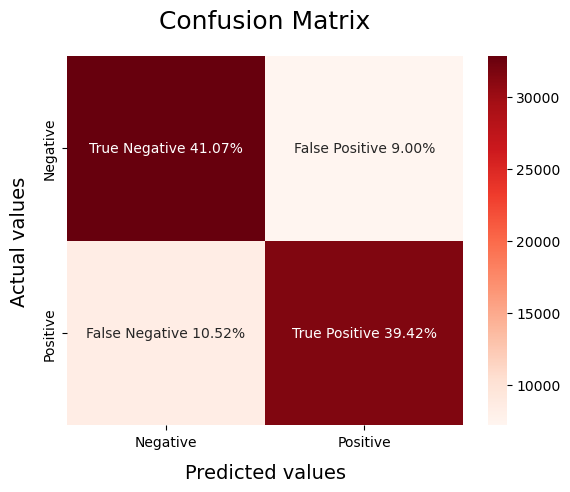

In [ ]:
BNBmodel = BernoulliNB()
BNBmodel.fit(x_train, y_train)
run_model(BNBmodel)
y_pred1 = BNBmodel.predict(x_test)

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds.

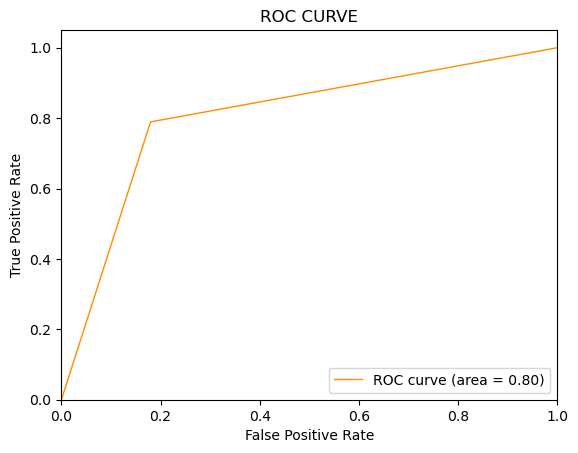

In [ ]:
from sklearn.metrics import roc_curve, auc
y_test = y_test.map({0: 0, 4: 1}).astype(int) #Due to the value error where we are sending {0,4} and the roc_curve requires {0,1}
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

Logistic Regression works for binary classification problems. It works well on large datasets and gives a good accuracy. It is essentially a form of binary classfication. 

The logistic regression algorithm analyzes relationships between variables. It assigns probabilities to discrete outcomes using the Sigmoid function, which converts numerical results into an expression of probability between 0 and 1.0.

              precision    recall  f1-score   support

           0       0.83      0.83      0.83     40049
           4       0.83      0.83      0.83     39951

    accuracy                           0.83     80000
   macro avg       0.83      0.83      0.83     80000
weighted avg       0.83      0.83      0.83     80000



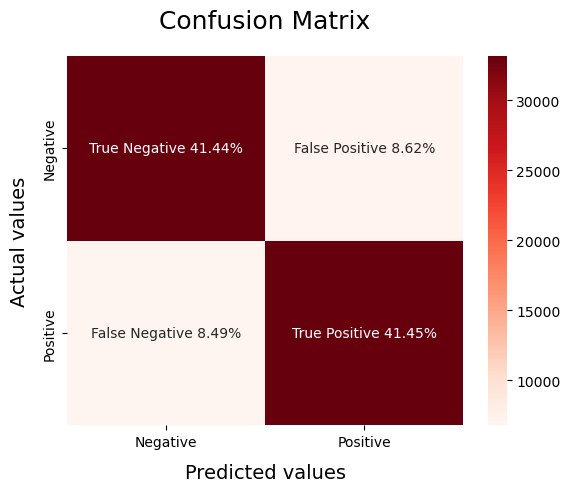

In [ ]:
y_test = y_test.map({0: 0, 1: 4}).astype(int)
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(x_train, y_train)
run_model(LRmodel)  
y_pred3 = LRmodel.predict(x_test)

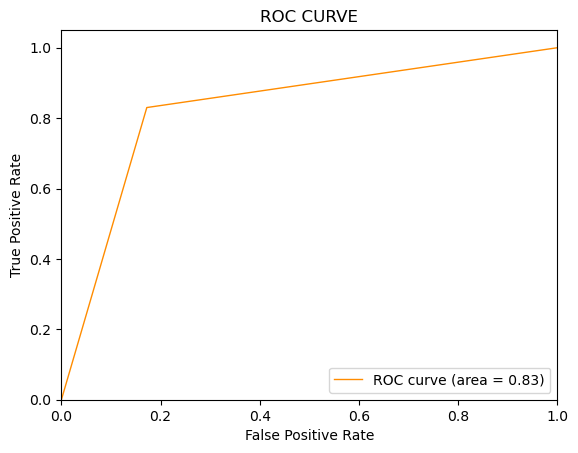

In [ ]:
from sklearn.metrics import roc_curve, auc
y_test = y_test.map({0: 0, 4: 1}).astype(int) 
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

The Random Forest Classifier fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. Uses feature randomness when building trees to have an uncorrelated forest, which results in good predictions. 

In [140]:
xi= x.head(50000)
xii= x.tail(50000)
x_new= pd.concat([xi, xii], ignore_index = True)
x_new.reset_index()
x_new

0        @switchfoot http://twitpic.com/2y1zl - Awww, t...
1        is upset that he can't update his Facebook by ...
2        @Kenichan I dived many times for the ball. Man...
3          my whole body feels itchy and like its on fire 
4        @nationwideclass no, it's not behaving at all....
                               ...                        
99995    Just woke up. Having no school is the best fee...
99996    TheWDB.com - Very cool to hear old Walt interv...
99997    Are you ready for your MoJo Makeover? Ask me f...
99998    Happy 38th Birthday to my boo of alll time!!! ...
99999    happy #charitytuesday @theNSPCC @SparksCharity...
Name: text, Length: 100000, dtype: object

In [141]:
yi= y.head(50000)
yii= y.tail(50000)
y_new= pd.concat([yi, yii], ignore_index = True)
y_new.reset_index()
y_new

0        0
1        0
2        0
3        0
4        0
        ..
99995    4
99996    4
99997    4
99998    4
99999    4
Name: target, Length: 100000, dtype: int64

In [142]:
# 95% data for training data and 5% for testing data
x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size = 0.05, random_state =0)

In [143]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=5000000) #Convert a collection of raw documents to a matrix of TF-IDF features.
vectoriser.fit(x_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))
x_train = vectoriser.transform(x_train)
x_test  = vectoriser.transform(x_test)

c:\Users\donto\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


No. of feature_words:  551559


In [144]:
def run_model(model):
# Predict values for Test dataset
  y_pred = model.predict(x_test)

# evaluate model 
  print(classification_report(y_test, y_pred))

# Compute and plot the Confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Positive']
  group_names = ['True Negative ','False Positive ', 'False Negative ','True Positive ']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.77      0.82      0.79      2506
           4       0.81      0.75      0.78      2494

    accuracy                           0.79      5000
   macro avg       0.79      0.79      0.79      5000
weighted avg       0.79      0.79      0.79      5000



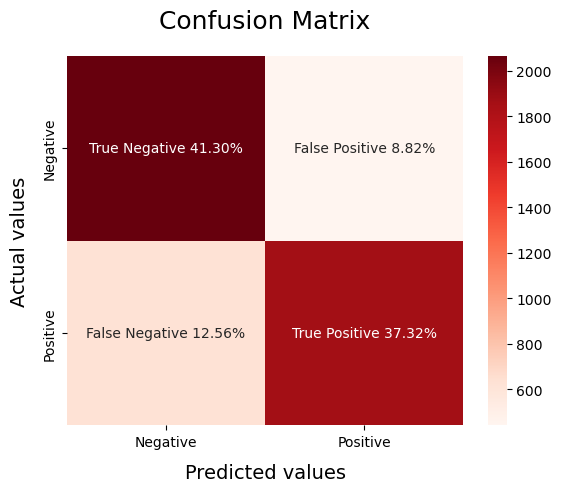

In [145]:
from sklearn.ensemble import RandomForestClassifier
#y_test = y_test.map({0: 0, 1: 4}).astype(int)
rf=RandomForestClassifier(random_state=0) #random state helps with the randomness of bootstrapping
rf.fit(x_train,y_train)
run_model(rf) 
pred_rf_count=rf.predict(x_test)

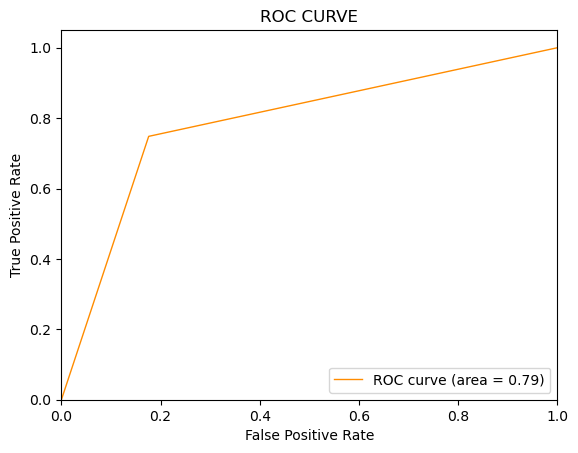

In [146]:
from sklearn.metrics import roc_curve, auc
y_test = y_test.map({0: 0, 4: 1}).astype(int) 
fpr, tpr, thresholds = roc_curve(y_test, pred_rf_count)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

##Conclusion: 


**Accuracy**: In terms of accuracy of the models, Logistic Regression performs better than Bernoulli Naive Bayes and the Random Forest Classifier.

**F1-score**: The F1 Scores for class 0 and class 4 are:

*For class 0*: Bernoulli Naive Bayes(accuracy = 0.81) == Random Forest Classifier (accuracy =0.77) < Logistic Regression (accuracy = 0.83)

*For class 4*: Bernoulli Naive Bayes(accuracy = 0.80) == Random Forest Classifier (accuracy =0.81) < Logistic Regression (accuracy = 0.83)

**ROC-AUC Score**: Logistic Regression (0.83)


Logistic Regression gives the best results as by looking at historical data, it is able to make the best predictions. 

**References**:

https://www.w3schools.com/python/python_ml_confusion_matrix.asp
https://www.capitalone.com/tech/machine-learning/understanding-tf-idf/
https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc
https://www.analyticsvidhya.com/blog/2021/06/twitter-sentiment-analysis-a-nlp-use-case-for-beginners/#h2_1
https://www.questionpro.com/blog/twitter-sentiment-analysis/#:~:text=A%20Twitter%20sentiment%20analysis%20is,attitudes%2C%20emotions%2C%20and%20opinions.
https://towardsdatascience.com/nlp-preprocessing-with-nltk-3c04ee00edc0
https://monkeylearn.com/blog/sentiment-analysis-of-twitter/
https://www.digitalvidya.com/blog/twitter-sentiment-analysis-introduction-and-techniques/
https://lzone.de/examples/Python%20re.sub
https://realpython.com/logistic-regression-python/#what-is-classification
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
https://stackoverflow.com/questions/68388739/valueerror-y-true-takes-value-in-true-false-and-pos-label-is-not-specifi
https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc